In [1]:
#Swapnil Saha Shawon 2022533042

In [2]:
#Importing libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt

In [3]:
# Load the data sets
X = np.load("/content/handsignX.npy")
y = np.load("/content/handsigny.npy")
print ('The first element of X is: ', X[0])
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

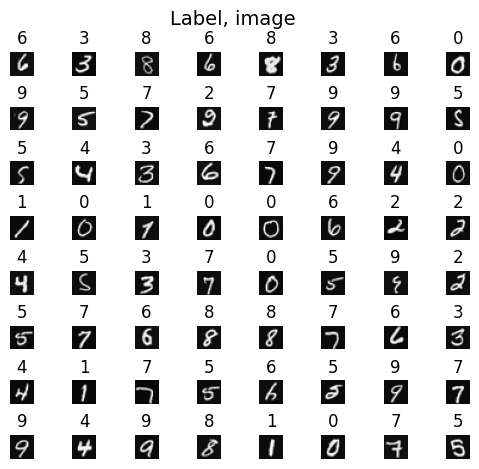

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [6]:
tf.random.set_seed(1234) # for consistent results


# Creating a Sequential model
model = Sequential([
    tf.keras.Input(shape=(400,)),  # Input layer with shape (400,)
    Dense(units=25, activation='relu'),  # Hidden layer with 25 units and ReLU activation
    Dense(units=15, activation='relu'),  # Hidden layer with 15 units and ReLU activation
    Dense(units=10, activation='linear')  # Output layer with 10 units and linear activation
], name='sequential_model')  # Naming the model as 'sequential_model'

model.summary()

Model: "sequential_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                10025     
                                                                 
 dense_4 (Dense)             (None, 15)                390       
                                                                 
 dense_5 (Dense)             (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
#compile the model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
# model history with 40 epochs
history = model.fit(
    X, y,
    epochs=40
)

Epoch 1/40
157/157 [==============================] - 1s 2ms/step - loss: 1.4902 - accuracy: 0.5234
Epoch 2/40
157/157 [==============================] - 0s 2ms/step - loss: 0.6065 - accuracy: 0.8412
Epoch 3/40
157/157 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8888
Epoch 4/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3215 - accuracy: 0.9152
Epoch 5/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2767 - accuracy: 0.9250
Epoch 6/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2454 - accuracy: 0.9324
Epoch 7/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2220 - accuracy: 0.9392
Epoch 8/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2007 - accuracy: 0.9448
Epoch 9/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1880 - accuracy: 0.9482
Epoch 10/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1676 - accuracy: 0.9550

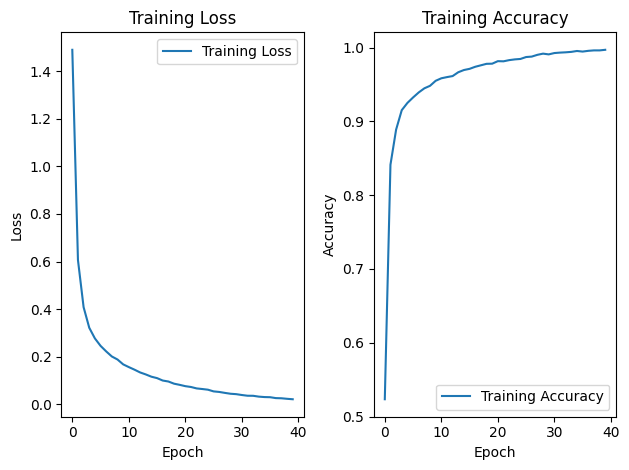

In [8]:
# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()